# Data Analysis On Indian Startups

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#opening file
df=pd.read_csv("C:\\Users\\shrin\\Downloads\\modified_dataset99.csv")
#saving file
savefile="C:\\Users\\shrin\\Downloads\\modified_datasetsave.csv"

C:\Users\shrin\AppData\Local\Temp\ipykernel_20448\2084640721.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:\\Users\\shrin\\Downloads\\modified_dataset99.csv")


In [3]:
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,Sub Vertical,City Location,Investment Type,Amount in USD,Company,Sector,Entry Valuation^^ ($B),Entry,Location,date_of_registration,state,category,class,company_type,authorized_capital,paidup_capital,activity_description
0,09-01-2020,BYJU?S,E-Tech,E-learning,Bengaluru,Private Equity Round,"40,00,00,000",InMobi,Adtech - Mobile Ads,1.0,Sep-11,Bangalore/Singapore,19-01-2021,Telangana,Company limited by Shares,Private,Non-govt company,1500000,102000,Construction
1,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Series C,"1,00,48,394",Flipkart^,E-Commerce,1.0,Feb-12,Bangalore/Singapore,25-01-2021,Tamil Nadu,Company limited by Shares,Private,Non-govt company,100000,3000,Business Services
2,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Series B,"3,83,58,860",Mu Sigma,SaaS - Analytics,1.0,Feb-13,Bangalore/Chicago,14-01-2021,Maharashtra,Company limited by Shares,Public,Non-govt company,500000,500000,Finance
3,02-01-2020,wealthbucket,FinTech,Online Investment,New Delhi,Pre-series A,"30,00,000",Snapdeal*,E-Commerce,1.8,Oct-14,Delhi,25-01-2021,Telangana,Company limited by Shares,Private,Non-govt company,1000000,10000,Business Services
4,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Seed Round,"18,00,000",PayTM^,Fintech - Payments & Wallet,1.7,Feb-15,Noida,19-01-2021,Jammu & Kashmir,Company limited by Shares,Private,Non-govt company,500000,500000,Business Services


## 1.Data cleaning

### 1.1 Remove unnessasry column 

In [4]:
columns_to_remove = ['S.No', 
                      'Investors Name', 
                      'Remarks', 
                        'company_uid',
                      'roc', 
                      'activity_code',
                     ]
print("Columns before removal:")
print(df.columns)
columns_to_remove_existing = list(set(columns_to_remove) & set(df.columns))
if columns_to_remove_existing:
    df.drop(columns=columns_to_remove_existing, inplace=True)
    print("\nColumns after removal:")
    print(df.columns)
else:
    print("No common columns found for removal.")

Columns before removal:
Index(['Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'Sub Vertical',
       'City  Location', 'Investment Type', 'Amount in USD', 'Company',
       'Sector', 'Entry Valuation^^ ($B)', 'Entry', 'Location',
       'date_of_registration', 'state', 'category', 'class', 'company_type',
       'authorized_capital', 'paidup_capital', 'activity_description'],
      dtype='object')
No common columns found for removal.


### 1.2 Remove duplicates 

In [5]:

duplicate_values = df.duplicated(subset=['Startup Name'], keep=False)
df_unique_values = df[~duplicate_values]

print("\nDataFrame after dropping rows with duplicate values in Column3:")

duplicate_values = df.duplicated(subset=['Company'], keep=False)
df_unique_values = df[~duplicate_values]
print("\nDataFrame after dropping rows with duplicate values in Column3:")



DataFrame after dropping rows with duplicate values in Column3:

DataFrame after dropping rows with duplicate values in Column3:


### 1.3 Filter missing values

In [6]:
df_no_empty_cells = df.dropna(subset=['Startup Name', 'Amount in USD'])

# Display the DataFrame after removing rows with empty cells
print("\nDataFrame after removing rows with empty cells in Column1 to Column2:")
#print(df_no_empty_cells)



DataFrame after removing rows with empty cells in Column1 to Column2:


In [7]:
df_no_empty_cells3 = df.dropna(subset=['state', 'paidup_capital'])
print("\nDataFrame after removing rows with empty cells in state,paidup_capital")
#print(df_no_empty_cells3)


DataFrame after removing rows with empty cells in state,paidup_capital


In [8]:
df_no_empty_cells2 = df.dropna(subset=['Company', 'Location'])

print("\nDataFrame after removing rows with empty cells in Company, Location:")
#print(df_no_empty_cells2)


DataFrame after removing rows with empty cells in Company, Location:


In [9]:

df.to_csv(savefile,index=False)

In [10]:
df.head()


,Date dd/mm/yyyy,Startup Name,Industry Vertical,Sub Vertical,City Location,Investment Type,Amount in USD,Company,Sector,Entry Valuation^^ ($B),Entry,Location,date_of_registration,state,category,class,company_type,authorized_capital,paidup_capital,activity_description
0,09-01-2020,BYJU?S,E-Tech,E-learning,Bengaluru,Private Equity Round,"40,00,00,000",InMobi,Adtech - Mobile Ads,1.0,Sep-11,Bangalore/Singapore,19-01-2021,Telangana,Company limited by Shares,Private,Non-govt company,1500000,102000,Construction
1,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Series C,"1,00,48,394",Flipkart^,E-Commerce,1.0,Feb-12,Bangalore/Singapore,25-01-2021,Tamil Nadu,Company limited by Shares,Private,Non-govt company,100000,3000,Business Services
2,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Series B,"3,83,58,860",Mu Sigma,SaaS - Analytics,1.0,Feb-13,Bangalore/Chicago,14-01-2021,Maharashtra,Company limited by Shares,Public,Non-govt company,500000,500000,Finance
3,02-01-2020,wealthbucket,FinTech,Online Investment,New Delhi,Pre-series A,"30,00,000",Snapdeal*,E-Commerce,1.8,Oct-14,Delhi,25-01-2021,Telangana,Company limited by Shares,Private,Non-govt company,1000000,10000,Business Services
4,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Seed Round,"18,00,000",PayTM^,Fintech - Payments & Wallet,1.7,Feb-15,Noida,19-01-2021,Jammu & Kashmir,Company limited by Shares,Private,Non-govt company,500000,500000,Business Services


In [11]:
print(df['Company'])

0           InMobi
1        Flipkart^
2         Mu Sigma
3        Snapdeal*
4           PayTM^
           ...    
54889          NaN
54890          NaN
54891          NaN
54892          NaN
54893          NaN
Name: Company, Length: 54894, dtype: object


### 1.4 Modifying date

In [12]:
column_to_modify = 'Date dd/mm/yyyy'
df[column_to_modify] = df[column_to_modify].astype(str).str[-4:]
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,Sub Vertical,City Location,Investment Type,Amount in USD,Company,Sector,Entry Valuation^^ ($B),Entry,Location,date_of_registration,state,category,class,company_type,authorized_capital,paidup_capital,activity_description
0,2020,BYJU?S,E-Tech,E-learning,Bengaluru,Private Equity Round,"40,00,00,000",InMobi,Adtech - Mobile Ads,1.0,Sep-11,Bangalore/Singapore,19-01-2021,Telangana,Company limited by Shares,Private,Non-govt company,1500000,102000,Construction
1,2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Series C,"1,00,48,394",Flipkart^,E-Commerce,1.0,Feb-12,Bangalore/Singapore,25-01-2021,Tamil Nadu,Company limited by Shares,Private,Non-govt company,100000,3000,Business Services
2,2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Series B,"3,83,58,860",Mu Sigma,SaaS - Analytics,1.0,Feb-13,Bangalore/Chicago,14-01-2021,Maharashtra,Company limited by Shares,Public,Non-govt company,500000,500000,Finance
3,2020,wealthbucket,FinTech,Online Investment,New Delhi,Pre-series A,"30,00,000",Snapdeal*,E-Commerce,1.8,Oct-14,Delhi,25-01-2021,Telangana,Company limited by Shares,Private,Non-govt company,1000000,10000,Business Services
4,2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Seed Round,"18,00,000",PayTM^,Fintech - Payments & Wallet,1.7,Feb-15,Noida,19-01-2021,Jammu & Kashmir,Company limited by Shares,Private,Non-govt company,500000,500000,Business Services


In [13]:
ycolumn = 'date_of_registration'

# Apply string slicing to keep only the first 2 characters
df[ycolumn] = df[ycolumn].astype(str).str[-2:]

In [14]:
df[ycolumn] = '20' + df[ycolumn].astype(str).str[-2:]

In [15]:
modify = 'Entry'


df[modify] = df[modify].astype(str).str[-2:]

In [16]:
df[modify] = '20' + df[modify].astype(str).str[:2]
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,Sub Vertical,City Location,Investment Type,Amount in USD,Company,Sector,Entry Valuation^^ ($B),Entry,Location,date_of_registration,state,category,class,company_type,authorized_capital,paidup_capital,activity_description
0,2020,BYJU?S,E-Tech,E-learning,Bengaluru,Private Equity Round,"40,00,00,000",InMobi,Adtech - Mobile Ads,1.0,2011,Bangalore/Singapore,2021,Telangana,Company limited by Shares,Private,Non-govt company,1500000,102000,Construction
1,2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Series C,"1,00,48,394",Flipkart^,E-Commerce,1.0,2012,Bangalore/Singapore,2021,Tamil Nadu,Company limited by Shares,Private,Non-govt company,100000,3000,Business Services
2,2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Series B,"3,83,58,860",Mu Sigma,SaaS - Analytics,1.0,2013,Bangalore/Chicago,2021,Maharashtra,Company limited by Shares,Public,Non-govt company,500000,500000,Finance
3,2020,wealthbucket,FinTech,Online Investment,New Delhi,Pre-series A,"30,00,000",Snapdeal*,E-Commerce,1.8,2014,Delhi,2021,Telangana,Company limited by Shares,Private,Non-govt company,1000000,10000,Business Services
4,2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Seed Round,"18,00,000",PayTM^,Fintech - Payments & Wallet,1.7,2015,Noida,2021,Jammu & Kashmir,Company limited by Shares,Private,Non-govt company,500000,500000,Business Services


In [17]:
ycolumn = 'Date dd/mm/yyyy'

# Convert the object datatype column to integer, coercing errors to NaN if any
df[ycolumn] = pd.to_numeric(df[ycolumn], errors='coerce', downcast='integer')
df[ycolumn] = df[ycolumn].astype('Int64', errors='ignore')

In [18]:
df[column_to_modify] = '20' + df[column_to_modify].astype(str).str[:2]

In [19]:
ycolumn = 'date_of_registration'

# Convert the object datatype column to integer, coercing errors to NaN if any
df[ycolumn] = pd.to_numeric(df[ycolumn], errors='coerce', downcast='integer')
df[ycolumn] = df[ycolumn].astype('Int64', errors='ignore')

In [20]:
ycolumn = 'Entry'

# Convert the object datatype column to integer, coercing errors to NaN if any
df[ycolumn] = pd.to_numeric(df[ycolumn], errors='coerce', downcast='integer')
df[ycolumn] = df[ycolumn].astype('Int64', errors='ignore')

### 1.5 modifying name of state

#### since inputed csv file contains state code we have to convert it to the original state name for readability and to understand result easily.

In [21]:
df['state'] = df['state'].replace("MH",'Maharashtra')
df['state'] = df['state'].replace("TN", 'Tamil Nadu')
df['state'] = df['state'].replace("TL", 'Telangana')
df['state'] = df['state'].replace("GJ",'Gujarat')
df['state'] = df['state'].replace("DL",'NCT of Delhi')
df['state'] = df['state'].replace("Delhi",'NCT of Delhi')
df['state'] = df['state'].replace("HR",'Haryana')
df['state'] = df['state'].replace("CH",'Chattisgarh')
df['state'] = df['state'].replace("PB",'Punjab')
df['state'] = df['state'].replace("KA",'Karnataka')
df['state'] = df['state'].replace("WB",'West Bengal')
df['state'] = df['state'].replace("RJ",'Rajasthan')
df['state'] = df['state'].replace("BR",'Bihar')
df['state'] = df['state'].replace("KL",'Kerala')
df['state'] = df['state'].replace("AP",'Andhra Pradesh')
df['state'] = df['state'].replace("JH",'Jarkhand' )
df['state'] = df['state'].replace("JK",'Jammu & Kashmir')
df['state'] = df['state'].replace("TR",'Tripura')
df['state'] = df['state'].replace("AN",'Andaman & Nicobar' )
df['state'] = df['state'].replace('Andaman & Nicobar','Andaman & Nicobar Island' )
df['state'] = df['state'].replace('NL','Nagaland')
df['state'] = df['state'].replace('Arunachal Pradesh','Arunanchal Pradesh')
df['state'] = df['state'].replace('AR','Arunanchal Pradesh')
df['state'] = df['state'].replace('DN','Dadra & Nagar Haveli')
df['state'] = df['state'].replace('Dadra & Nagar Haveli','Dadara & Nagar Havelli')
df['state'] = df['state'].replace("MZ",'Mizoram')
df['state'] = df['state'].replace("LD",'Ladakh')
df['state'] = df['state'].replace("PY",'Pondicherry')
df['state'] = df['state'].replace('Pondicherry','Puducherry')
df['state'] = df['state'].replace("GA",'Goa')
df['state'] = df['state'].replace("MN",'Manipur')
df['state'] = df['state'].replace("ML",'Meghalaya')
df['state'] = df['state'].replace("HP",'Himachal Pradesh')
df['state'] = df['state'].replace("UP",'Uttarakhand')
df['state'] = df['state'].replace("AS",'Assam')
df['state'] = df['state'].replace("OR",'Odisha')
df['state'] = df['state'].replace("Orissa",'Odisha')
df['state'] = df['state'].replace("TG",'Telangana')
df['state'] = df['state'].replace("MP",'Madhya Pradesh')
df['state'] = df['state'].replace("UR",'Uttarakhand')
df['state'] = df['state'].replace("Chattisgarh",'Chhattisgarh')
df['state'] = df['state'].replace("CH",'Chhattisgarh')
df['state'] = df['state'].replace("LH",'Ladakh')

df.to_csv(savefile, index=False)

### 1.6 Conversions USD to Rupees 

In [22]:
your_column = 'Amount in USD'
# Remove commas from the specified column
df[your_column] = df[your_column].str.replace(',', '')

# Convert the object datatype column to integer, coercing errors to NaN if any
df[your_column] = pd.to_numeric(df[your_column], errors='coerce')

print(df.dtypes)
your_column = 'Amount in USD'
df[your_column] = df[your_column] * 83.12/10000000
df.rename(columns={'Amount in USD': 'valuation in Rupees'}, inplace=True)

Date dd/mm/yyyy            object
Startup Name               object
Industry Vertical          object
Sub Vertical               object
City  Location             object
Investment Type            object
Amount in USD             float64
Company                    object
Sector                     object
Entry Valuation^^ ($B)    float64
Entry                       Int64
Location                   object
date_of_registration        Int64
state                      object
category                   object
class                      object
company_type               object
authorized_capital          int64
paidup_capital              int64
activity_description       object
dtype: object


In [23]:
column_to_modify = 'Entry'

# Apply string slicing to keep only the last 4 characters
df[column_to_modify] = df[column_to_modify].astype(str).str[-2:]
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,Sub Vertical,City Location,Investment Type,valuation in Rupees,Company,Sector,Entry Valuation^^ ($B),Entry,Location,date_of_registration,state,category,class,company_type,authorized_capital,paidup_capital,activity_description
0,2020,BYJU?S,E-Tech,E-learning,Bengaluru,Private Equity Round,3324.800000,InMobi,Adtech - Mobile Ads,1.0,11,Bangalore/Singapore,2021,Telangana,Company limited by Shares,Private,Non-govt company,1500000,102000,Construction
1,2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Series C,83.522251,Flipkart^,E-Commerce,1.0,12,Bangalore/Singapore,2021,Tamil Nadu,Company limited by Shares,Private,Non-govt company,100000,3000,Business Services
2,2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Series B,318.838844,Mu Sigma,SaaS - Analytics,1.0,13,Bangalore/Chicago,2021,Maharashtra,Company limited by Shares,Public,Non-govt company,500000,500000,Finance
3,2020,wealthbucket,FinTech,Online Investment,New Delhi,Pre-series A,24.936000,Snapdeal*,E-Commerce,1.8,14,Delhi,2021,Telangana,Company limited by Shares,Private,Non-govt company,1000000,10000,Business Services
4,2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Seed Round,14.961600,PayTM^,Fintech - Payments & Wallet,1.7,15,Noida,2021,Jammu & Kashmir,Company limited by Shares,Private,Non-govt company,500000,500000,Business Services


In [24]:
df[column_to_modify] = '20' + df[column_to_modify].astype(str).str[:2]

In [25]:
print(df['state'])

0              Telangana
1             Tamil Nadu
2            Maharashtra
3              Telangana
4        Jammu & Kashmir
              ...       
54889         Tamil Nadu
54890       NCT of Delhi
54891        Maharashtra
54892            Haryana
54893       NCT of Delhi
Name: state, Length: 54894, dtype: object


In [26]:
# Assuming 'your_column' is the column you want to modify
your_column = 'date_of_registration'

# Apply string slicing to keep only the first 2 characters
df[your_column] = df[your_column].astype(str).str[-2:]

In [27]:
df[your_column] = '20' + df[your_column].astype(str).str[:2]

In [28]:
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,Sub Vertical,City Location,Investment Type,valuation in Rupees,Company,Sector,Entry Valuation^^ ($B),Entry,Location,date_of_registration,state,category,class,company_type,authorized_capital,paidup_capital,activity_description
0,2020,BYJU?S,E-Tech,E-learning,Bengaluru,Private Equity Round,3324.800000,InMobi,Adtech - Mobile Ads,1.0,2011,Bangalore/Singapore,2021,Telangana,Company limited by Shares,Private,Non-govt company,1500000,102000,Construction
1,2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Series C,83.522251,Flipkart^,E-Commerce,1.0,2012,Bangalore/Singapore,2021,Tamil Nadu,Company limited by Shares,Private,Non-govt company,100000,3000,Business Services
2,2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Series B,318.838844,Mu Sigma,SaaS - Analytics,1.0,2013,Bangalore/Chicago,2021,Maharashtra,Company limited by Shares,Public,Non-govt company,500000,500000,Finance
3,2020,wealthbucket,FinTech,Online Investment,New Delhi,Pre-series A,24.936000,Snapdeal*,E-Commerce,1.8,2014,Delhi,2021,Telangana,Company limited by Shares,Private,Non-govt company,1000000,10000,Business Services
4,2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Seed Round,14.961600,PayTM^,Fintech - Payments & Wallet,1.7,2015,Noida,2021,Jammu & Kashmir,Company limited by Shares,Private,Non-govt company,500000,500000,Business Services


In [29]:
column = 'Entry Valuation^^ ($B)'
df[column] = df[column] * 83.12

In [30]:
df.rename(columns={'Entry Valuation^^ ($B)': 'Entry Valuation'}, inplace=True)

###  1.7 Finding Insites 

### 1.7.1Company type

In [31]:
your_column = 'company_type'

# finding the count
sentence_counts = df[your_column].value_counts()

for sentence, count in sentence_counts.items():
    print(f"Sentence: '{sentence}' - Count: {count}")

Sentence: 'Non-govt company' - Count: 54389
Sentence: 'Subsidiary of Foreign Company' - Count: 430
Sentence: 'Guarantee and Association comp' - Count: 50
Sentence: 'State Govt company' - Count: 19
Sentence: 'Union Govt company' - Count: 6


### 1.7.2 Category 

In [35]:
your_column = 'category'
sentence_counts = df[your_column].value_counts()
for sentence, count in sentence_counts.items():
    print(f"Sentence: '{sentence}' - Count: {count}")

Sentence: 'Company limited by Shares' - Count: 54559
Sentence: 'Company Limited by Guarantee' - Count: 335


### 1.7.3 Class 

In [32]:
your_column = 'class'
sentence_counts = df[your_column].value_counts()
for sentence, count in sentence_counts.items():
    print(f"Sentence: '{sentence}' - Count: {count}")

Sentence: 'Private' - Count: 50457
Sentence: 'Private(One Person Company)' - Count: 3277
Sentence: 'Public' - Count: 1160


In [33]:
data = np.random.randn(1000)

# Calculate Z-scores
z_scores = (data - np.mean(data)) / np.std(data)

# Defineing the thrshold
threshold = 3

# Identify outliers
outliers = np.where(np.abs(z_scores) > threshold)[0]

print("Outliers indices:", outliers)
print("Outliers values:", data[outliers])
df.head()

Outliers indices: [392 528]
Outliers values: [3.44688613 3.31588451]


,Date dd/mm/yyyy,Startup Name,Industry Vertical,Sub Vertical,City Location,Investment Type,valuation in Rupees,Company,Sector,Entry Valuation,Entry,Location,date_of_registration,state,category,class,company_type,authorized_capital,paidup_capital,activity_description
0,2020,BYJU?S,E-Tech,E-learning,Bengaluru,Private Equity Round,3324.800000,InMobi,Adtech - Mobile Ads,83.120,2011,Bangalore/Singapore,2021,Telangana,Company limited by Shares,Private,Non-govt company,1500000,102000,Construction
1,2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Series C,83.522251,Flipkart^,E-Commerce,83.120,2012,Bangalore/Singapore,2021,Tamil Nadu,Company limited by Shares,Private,Non-govt company,100000,3000,Business Services
2,2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Series B,318.838844,Mu Sigma,SaaS - Analytics,83.120,2013,Bangalore/Chicago,2021,Maharashtra,Company limited by Shares,Public,Non-govt company,500000,500000,Finance
3,2020,wealthbucket,FinTech,Online Investment,New Delhi,Pre-series A,24.936000,Snapdeal*,E-Commerce,149.616,2014,Delhi,2021,Telangana,Company limited by Shares,Private,Non-govt company,1000000,10000,Business Services
4,2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Seed Round,14.961600,PayTM^,Fintech - Payments & Wallet,141.304,2015,Noida,2021,Jammu & Kashmir,Company limited by Shares,Private,Non-govt company,500000,500000,Business Services


### 1.7.4 Outliers 

In [35]:
data = np.random.randn(1000)  #to replace with old one

# Calculate quartiles
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)

# Calculate IQR (Interquartile Range)
iqr = q3 - q1

# Define a threshold 
threshold = 1.5

# Identify outliers
outliers = np.where((data < q1 - threshold * iqr) | (data > q3 + threshold * iqr))[0]

print("Outliers indices:", outliers)
print("Outliers values:", data[outliers])

Outliers indices: [434 442 463 523 759]
Outliers values: [ 2.8208076   3.28100308 -3.63549811 -3.20217835 -2.96592002]


## 1.8 Editing Name 

In [36]:
#just to replace lengthy names
company_to_replace = 'Community, personal & Social Services'
new_company_name = 'C.P.S service'
company_to_replace2 = 'Manufacturing (Metals & Chemicals, and products thereof)'
new_company_name2 = 'manufacturing(metals,chemical)'
company_to_replace3='Manufacturing (Paper & Paper products, Publishing, printingand reproduction of recorded media)'
new_company_name3='Manufactuing paper products'
df['activity_description'] = df['activity_description'].replace(company_to_replace, new_company_name)
df['activity_description'] = df['activity_description'].replace(company_to_replace2, new_company_name2)
df['activity_description'] = df['activity_description'].replace(company_to_replace3, new_company_name3)
df.to_csv(savefile, index=False)


In [37]:
company_to_replace = 'Manufacturing (Metals & Chemicals, and products thereof)'
new_company_name = 'manufacturing(metals,chemical)'
df['activity_description'] = df['activity_description'].replace(company_to_replace, new_company_name)

df.to_csv(savefile, index=False)

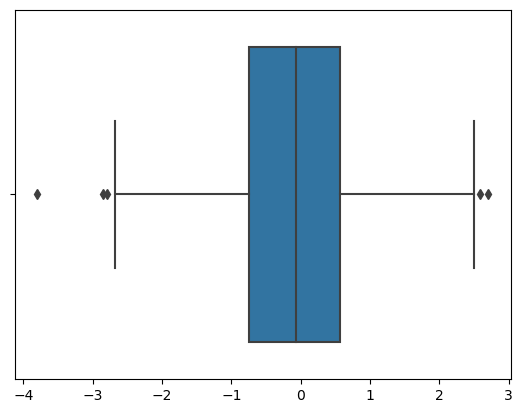

In [38]:
# Generate some sample data
data = np.random.randn(1000)
sns.boxplot(x=data)
plt.show()

In [39]:
#cleaned_data

df.to_csv(savefile, index=False)

# 2.Visualization

## 2.1 Graph of number of Startup vs States

In [40]:
state_counts = df['state'].value_counts().to_dict()
print(state_counts)

{'Maharashtra': 10077, 'NCT of Delhi': 5449, 'Uttar Pradesh': 4239, 'Karnataka': 4213, 'Telangana': 3655, 'Tamil Nadu': 3515, 'Gujarat': 3057, 'Haryana': 2705, 'West Bengal': 2551, 'Kerala': 2084, 'Bihar': 1997, 'Rajasthan': 1979, 'Uttarakhand': 1965, 'Madhya Pradesh': 1578, 'Andhra Pradesh': 1184, 'Odisha': 1110, 'Punjab': 771, 'Jharkhand': 454, 'Assam': 440, 'Chhattisgarh': 370, 'Jammu & Kashmir': 331, 'Himachal Pradesh': 244, 'Jarkhand': 193, 'Chandigarh': 168, 'Goa': 153, 'CT': 119, 'Manipur': 83, 'Puducherry': 49, 'Tripura': 39, 'Arunanchal Pradesh': 23, 'Nagaland': 21, 'Meghalaya': 18, 'Dadara & Nagar Havelli': 18, 'Andaman & Nicobar Island': 15, 'Daman and Diu': 11, 'Mizoram': 10, 'Ladakh': 5, 'Lakshadweep': 1}


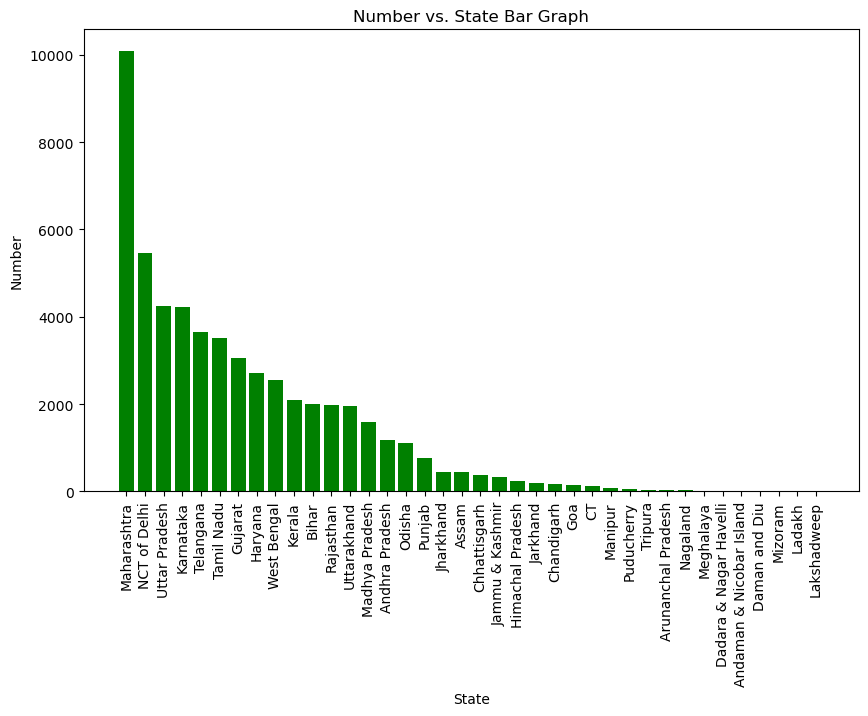

In [41]:
states = list(state_counts.keys())
numbers = list(state_counts.values())
plt.figure(figsize=(10, 6))

plt.bar(states, numbers, color='green')


plt.xlabel('State')
plt.ylabel('Number')
plt.title('Number vs. State Bar Graph')
plt.xticks(rotation='vertical') 
plt.show()

In [42]:
company_type = df['activity_description'].value_counts().to_dict()

## 2.2 Type of company vs number 

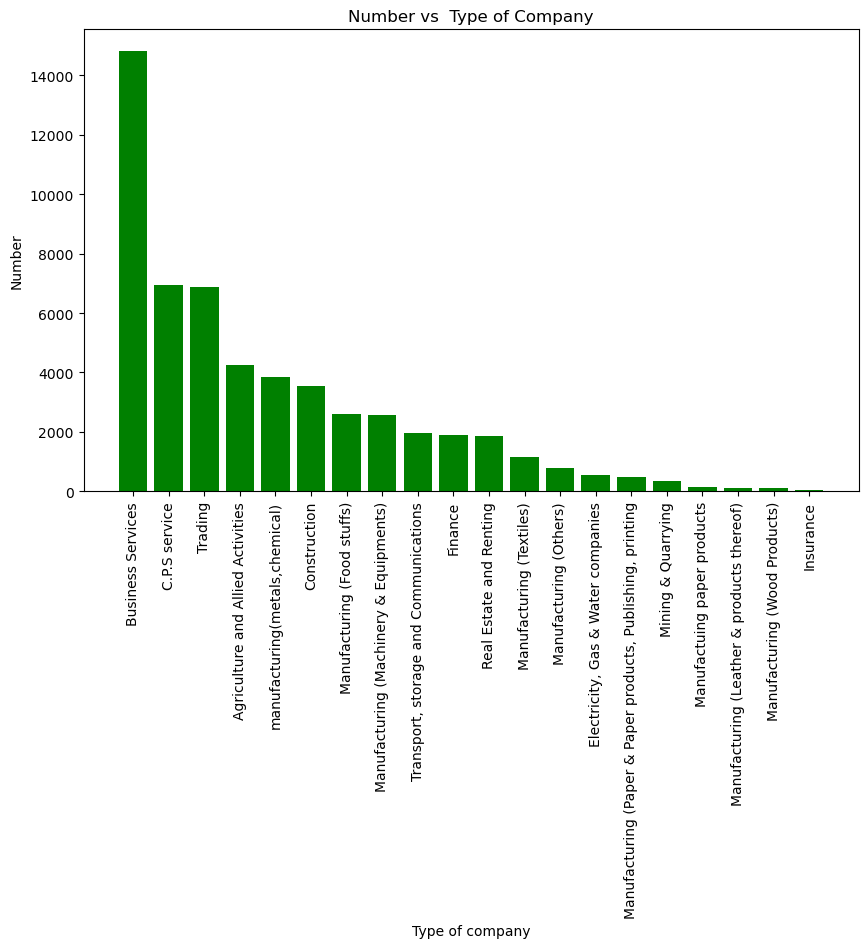

In [43]:
tycom= list(company_type.keys())

numbers2 = list(company_type.values())

plt.figure(figsize=(10, 6))
# Create a bar graph
plt.bar(tycom, numbers2, color='green')

# Add labels and title
plt.xlabel('Type of company')
plt.ylabel('Number')
plt.title('Number vs  Type of Company')
plt.xticks(rotation='vertical') 

# Display the graph
plt.show()

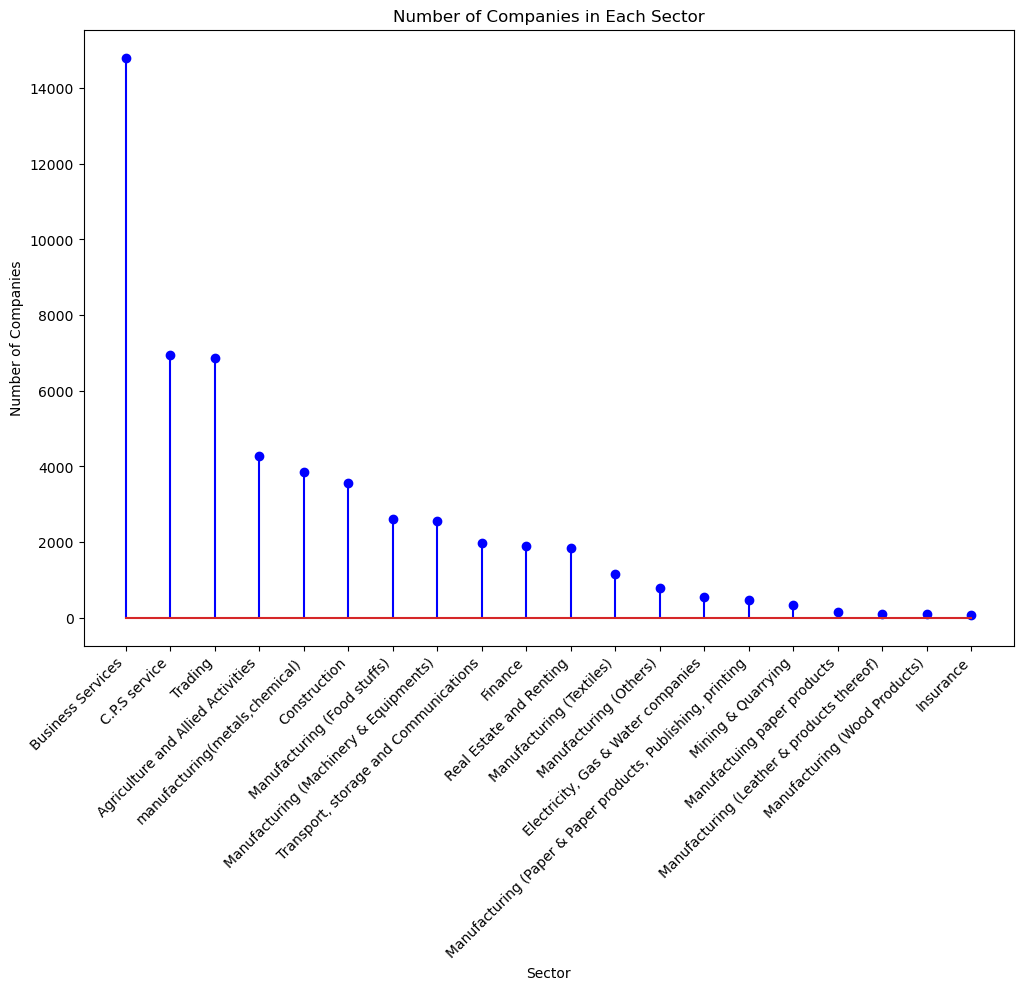

In [44]:
# Count the number of companies in each sector
sector_counts = df['activity_description'].value_counts()

# Create a stem plot
plt.figure(figsize=(12, 8))
plt.stem(sector_counts.index, sector_counts.values, markerfmt='bo', linefmt='b-')

# Set labels and title
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.title('Number of Companies in Each Sector')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## 2.3 Top 10 Industry Verticals by Number of Startups  

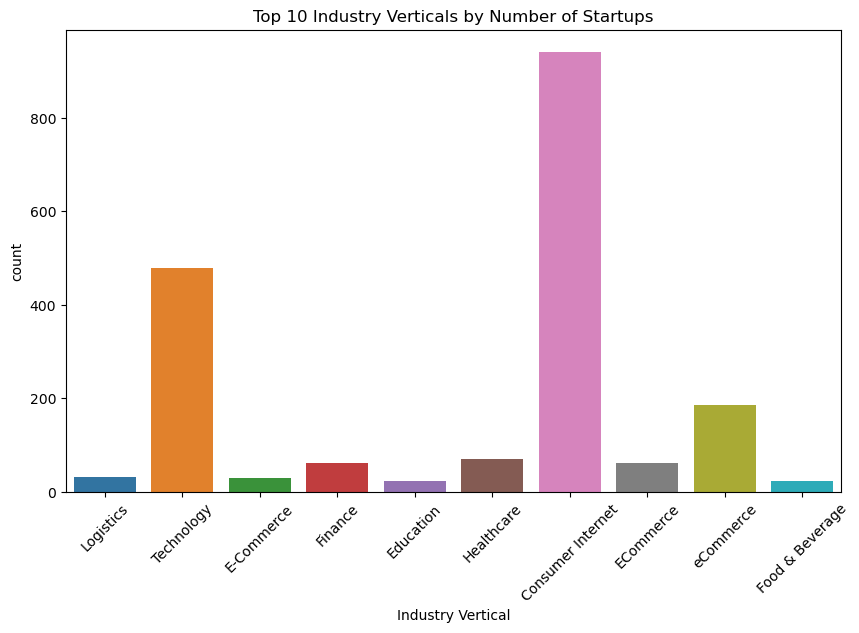

In [45]:
top_industries = df['Industry Vertical'].value_counts().nlargest(10).index

plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Industry Vertical'].isin(top_industries)], x='Industry Vertical')
plt.xticks(rotation=45)
plt.title('Top 10 Industry Verticals by Number of Startups')
plt.show()

##  2.4 Distribution of Top 10 Investment Types

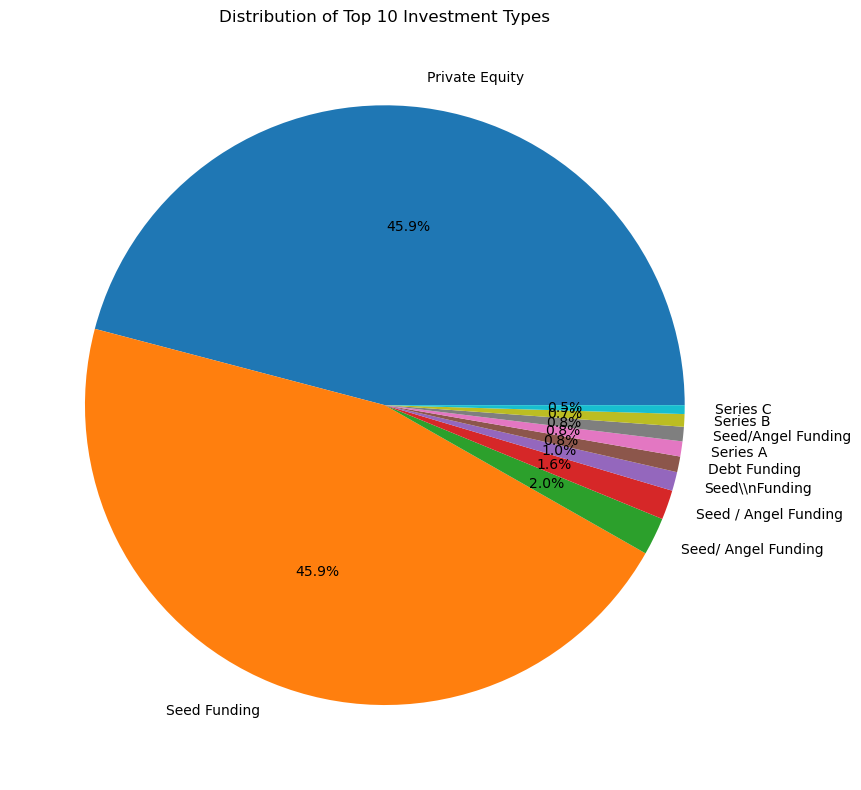

In [46]:
top_investment_types = df['Investment Type'].value_counts().nlargest(10)

plt.figure(figsize=(12, 8))
plt.pie(top_investment_types, labels=top_investment_types.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Top 10 Investment Types')
plt.tight_layout() 
plt.show()

## 2.5 Scatter Plot of Entry Valuation vs. Valuation 

C:\Users\shrin\AppData\Local\Temp\ipykernel_20448\1603893356.py:2: DtypeWarning: Columns (1,2,3,4,5,7,8,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv("C:\\Users\\shrin\\Downloads\\modified_datasetsave.csv")


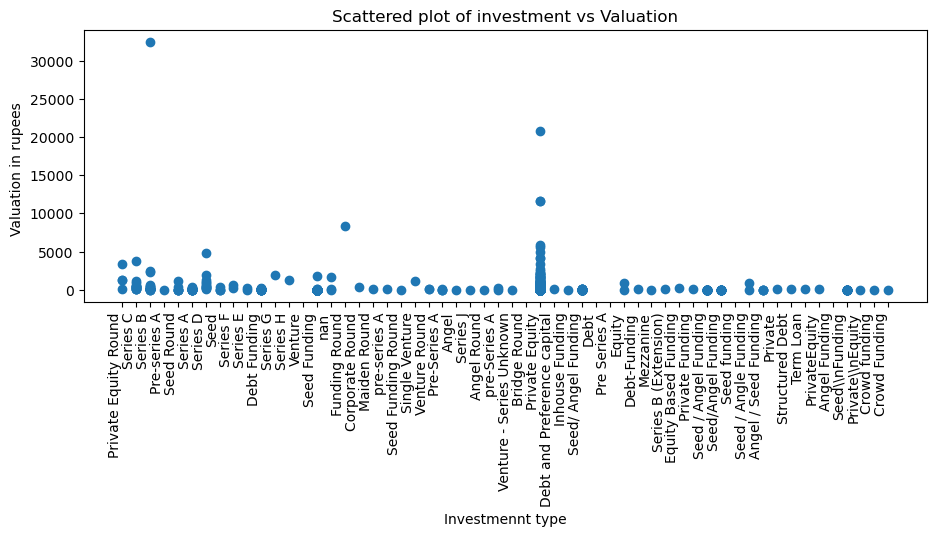

In [47]:
import pandas as pd
df2=pd.read_csv("C:\\Users\\shrin\\Downloads\\modified_datasetsave.csv")
df2['Investment Type']=df2['Investment Type'].astype(str)

plt.scatter(df2['Investment Type'],df2['valuation in Rupees'])
plt.xlabel('Investmennt type')
plt.ylabel('Valuation in rupees ')
plt.title('Scattered plot of investment vs Valuation')
plt.xticks(rotation='vertical',ha='right')
plt.gcf().set_size_inches(10,6)
plt.tight_layout(pad=3.0)
plt.show()

## 2.6 Top 10 Investment Types - Heatmap

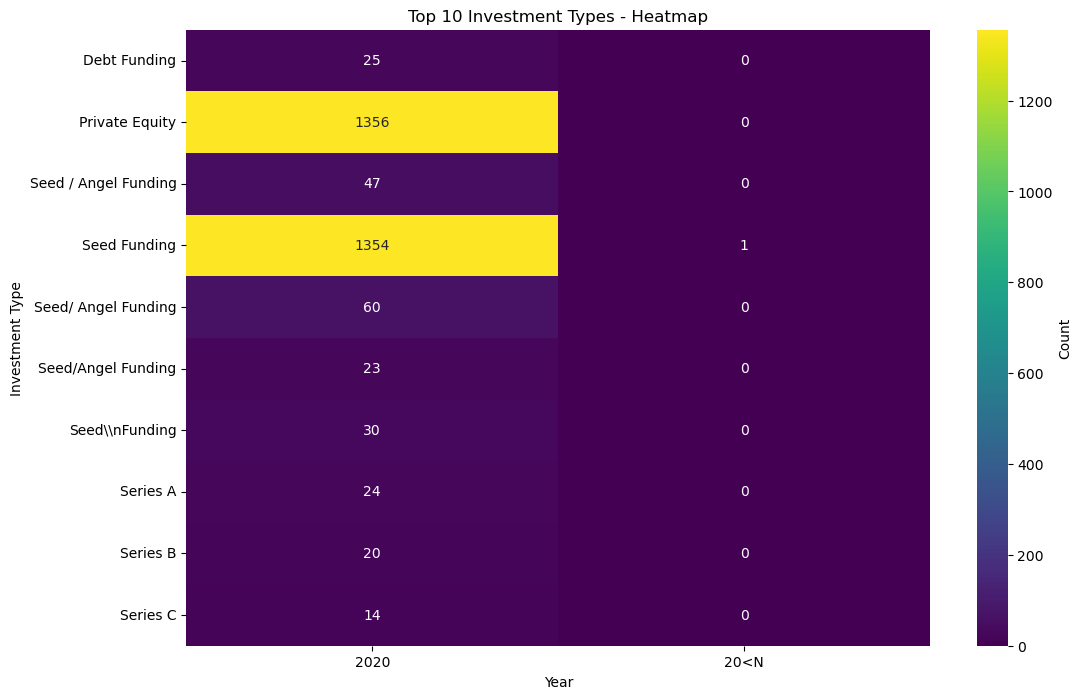

In [48]:
top_investment_types = df['Investment Type'].value_counts().nlargest(10)
filtered_df = df[df['Investment Type'].isin(top_investment_types.index)]
heatmap_data = filtered_df.pivot_table(index='Investment Type', columns='Date dd/mm/yyyy', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='g', cbar_kws={'label': 'Count'})
plt.title('Top 10 Investment Types - Heatmap')
plt.xlabel('Year')
plt.ylabel('Investment Type')

plt.show()

## 2.7 Number of Companies Over Years

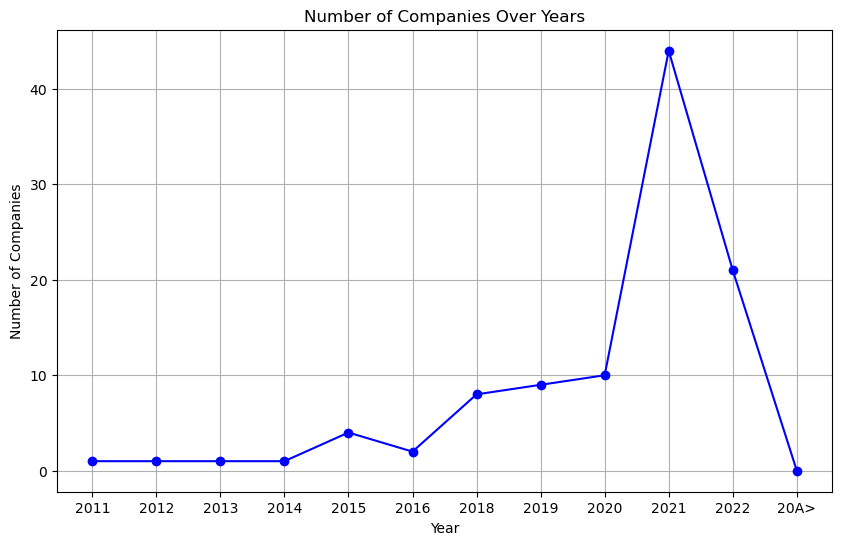

In [49]:
# Count the number of unique companies for each year
company_count = df.groupby('Entry')['Company'].nunique().reset_index()

# Plotting the line chart for the number of companies
plt.figure(figsize=(10, 6))

# Plot the line chart
plt.plot(company_count['Entry'], company_count['Company'], marker='o', linestyle='-', color='b')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Companies')
plt.title('Number of Companies Over Years')
plt.grid(True)

# Show the plot
plt.show()

## 2.8 Scatter Plot of number of companies in each sector

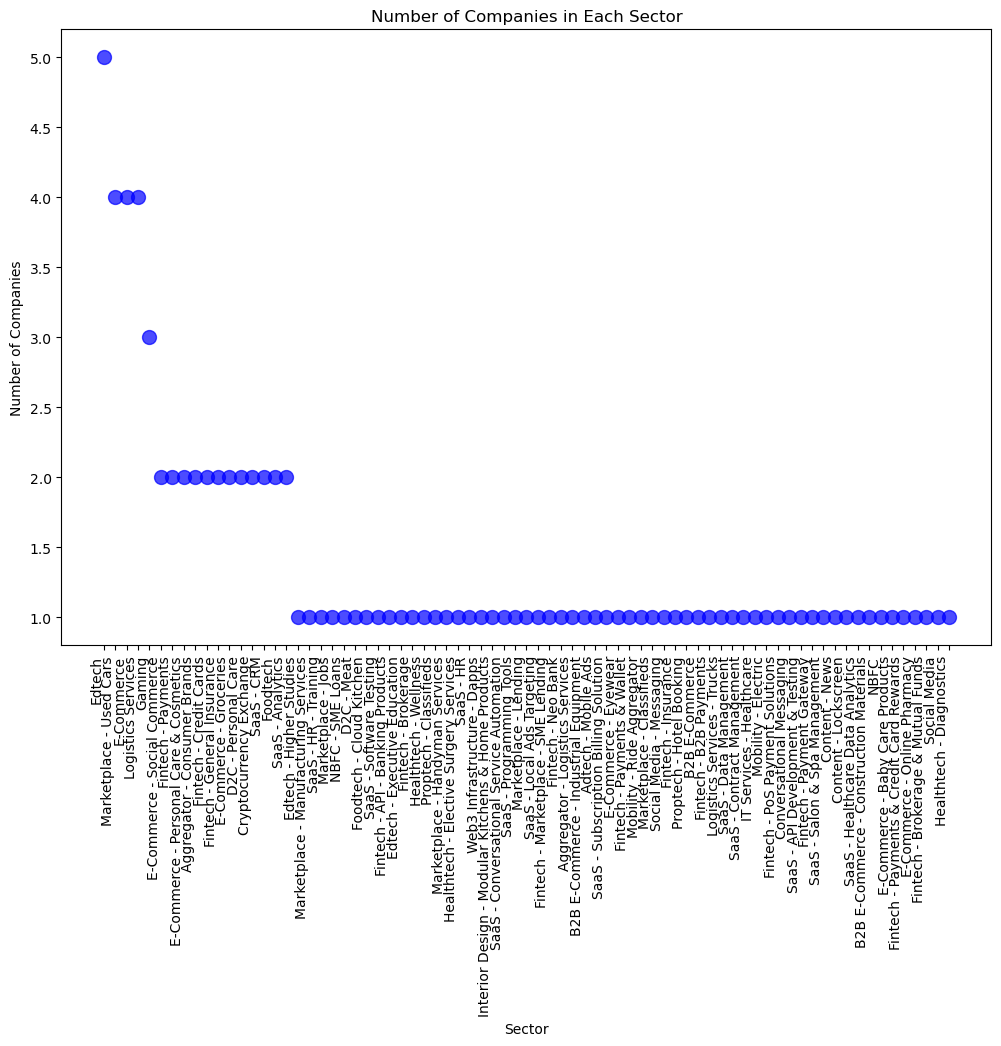

In [60]:
sector_counts = df['Sector'].value_counts()

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(sector_counts.index, sector_counts.values, s=100, c='blue', alpha=0.7)

# Set labels and title
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.title('Number of Companies in Each Sector')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.show()